In [1]:
import pandas as pd

In [4]:
bank=pd.read_csv("bank-additional.csv",sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [11]:
print bank.y.value_counts()
print bank.shape


no     3668
yes     451
Name: y, dtype: int64
(4119, 21)


In [12]:
bank["outcome"]=bank.y.map({"no":0,"yes":1})

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

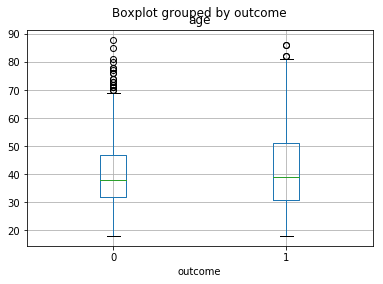

In [19]:
bank.boxplot(column="age",by="outcome")

In [22]:
bank.groupby("job").outcome.mean()

job
admin.           0.131423
blue-collar      0.069005
entrepreneur     0.054054
housemaid        0.100000
management       0.092593
retired          0.228916
self-employed    0.081761
services         0.089059
student          0.231707
technician       0.115774
unemployed       0.171171
unknown          0.102564
Name: outcome, dtype: float64

In [25]:
job_dummies=pd.get_dummies(bank.job,prefix='job')
job_dummies.drop(job_dummies.columns[0],axis=1,inplace=True)
job_dummies

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0


In [26]:
bank.groupby('default').outcome.mean()

default
no         0.121267
unknown    0.061021
yes        0.000000
Name: outcome, dtype: float64

In [27]:
bank.default.value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [28]:
bank['default']=bank.default.map({'no':0,'unknown':1,'yes':1})

In [29]:
bank.groupby('contact').outcome.mean()

contact
cellular     0.141403
telephone    0.051806
Name: outcome, dtype: float64

In [30]:
bank['contact']=bank.contact.map({'cellular':0,'telephone':1})

In [31]:
bank.groupby('month').outcome.mean()

month
apr    0.167442
aug    0.100629
dec    0.545455
jul    0.082982
jun    0.128302
mar    0.583333
may    0.065312
nov    0.096413
oct    0.362319
sep    0.406250
Name: outcome, dtype: float64

In [35]:
bank.groupby('month').outcome.agg(['count','mean']).sort_values('count')

,count,mean
month,,
dec,22,0.545455
mar,48,0.583333
sep,64,0.406250
oct,69,0.362319
apr,215,0.167442
nov,446,0.096413
jun,530,0.128302
aug,636,0.100629
jul,711,0.082982


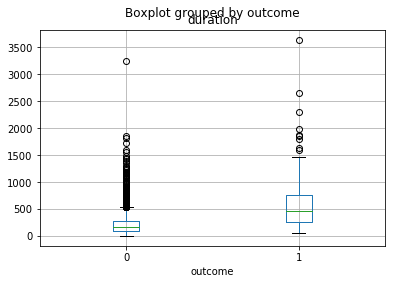

In [36]:
bank.boxplot(column='duration',by='outcome')

In [37]:
bank.groupby('previous').outcome.mean()

previous
0    0.082884
1    0.208421
2    0.410256
3    0.600000
4    0.714286
5    1.000000
6    0.500000
Name: outcome, dtype: float64

In [38]:
bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.147577
nonexistent    0.082884
success        0.647887
Name: outcome, dtype: float64

In [40]:
poutcomedummies=pd.get_dummies(bank.poutcome,prefix="poutcome_")
poutcomedummies.drop(poutcomedummies.columns[0],axis=1,inplace=True)

In [41]:
#concat jobdummies,poutcomes,bank
print bank.shape
bank=pd.concat([bank,job_dummies,poutcomedummies],axis=1)
bank.shape

(4119, 22)


(4119, 35)

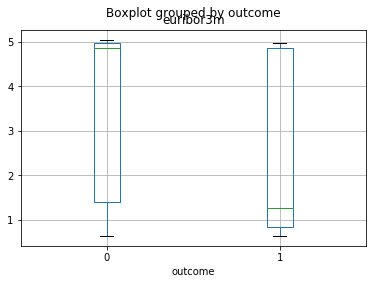

In [43]:
bank.boxplot(column='euribor3m',by='outcome')

In [44]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'outcome',
       u'job_blue-collar', u'job_entrepreneur', u'job_housemaid',
       u'job_management', u'job_retired', u'job_self-employed',
       u'job_services', u'job_student', u'job_technician', u'job_unemployed',
       u'job_unknown', u'poutcome__nonexistent', u'poutcome__success'],
      dtype='object')

In [46]:
feature_cols=['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
X=bank[feature_cols]

In [47]:
y=bank.outcome

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg=LogisticRegression(C=100)
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.75567197563400712